<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("ggplot")

import matplotlib.font_manager as fm


# 폰트 경로 설정 (실제 경로로 수정)
font_path = '/content/drive/MyDrive/malgun.ttf'

# 폰트 엔트리 생성
font_entry = fm.FontEntry(fname=font_path, name='malgun')

# 폰트 매니저에 등록
fm.fontManager.ttflist.insert(0, font_entry)

# 폰트 설정
plt.rcParams['font.family'] = 'malgun'

#fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name ='MaruBuri')
#fm.fontManager.ttflist.insert(0, fe)
#plt.rc('font', family='MaruBuri')

In [ ]:
competition_info_df = pd.read_csv('/content/drive/MyDrive/competition_info.csv')
participate_log_df = pd.read_csv('/content/drive/MyDrive/participate_log.csv')
submission_log_df = pd.read_csv('/content/drive/MyDrive/submission_log.csv')
talk_log_df = pd.read_csv('/content/drive/MyDrive/talk_log.csv')
codeshare_log_df = pd.read_csv('/content/drive/MyDrive/codeshare_log.csv')

In [ ]:
competition_info_df.head(2)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회 기간(일)
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74


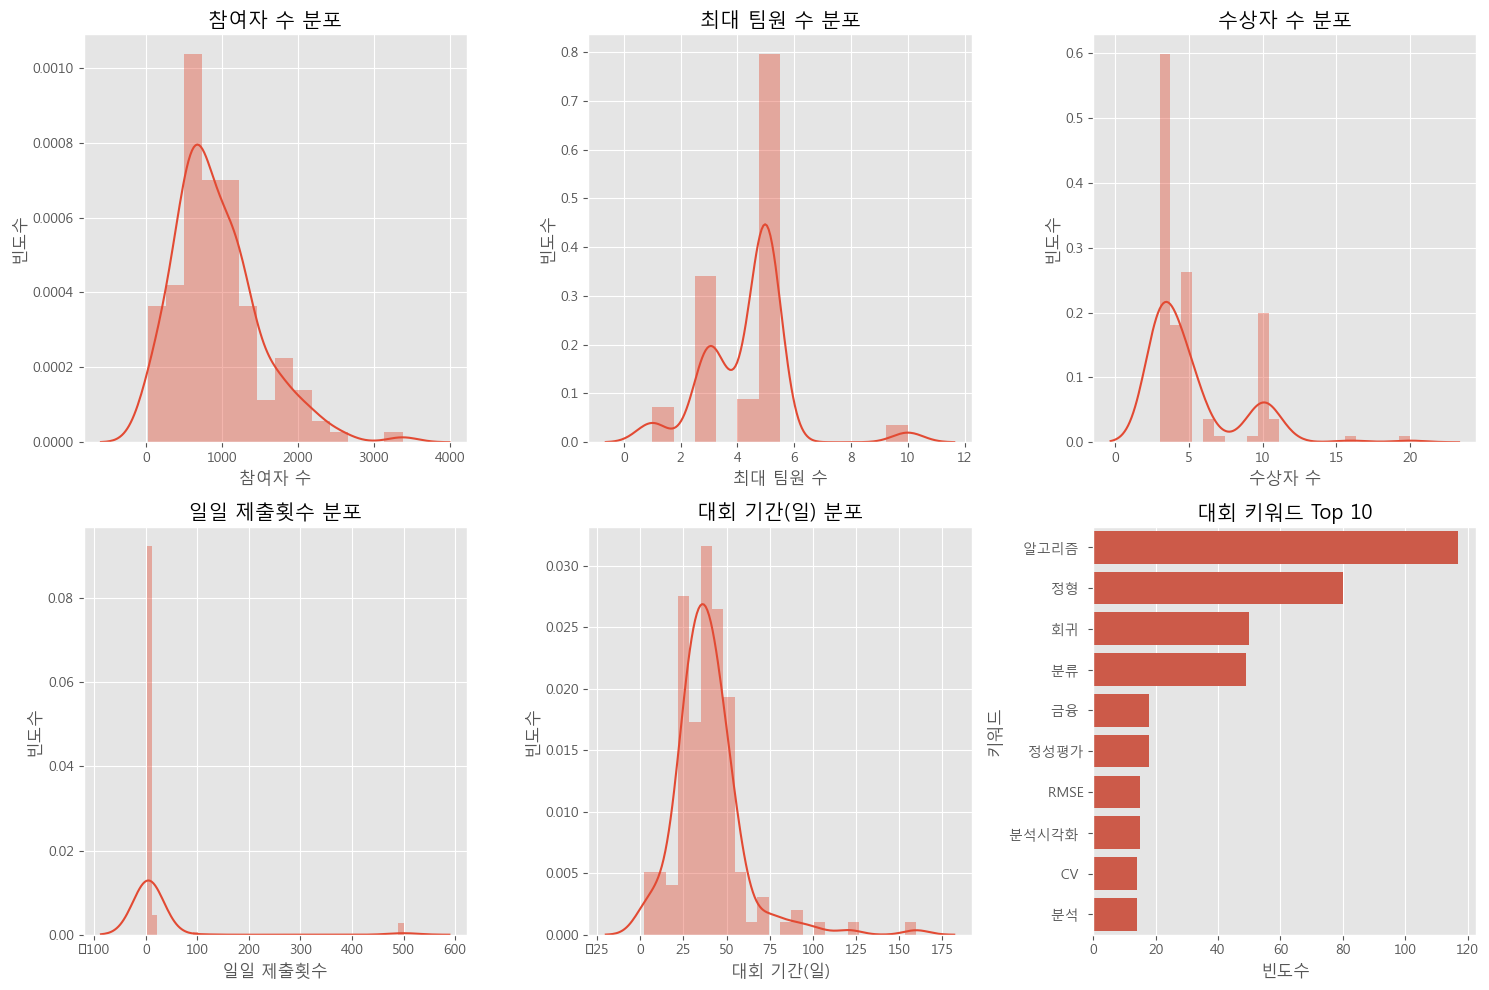

In [ ]:
# 날짜 관련 컬럼을 datetime 형식으로 변환합니다.
competition_info_df['시작시간'] = pd.to_datetime(competition_info_df['시작시간'])
competition_info_df['종료시간'] = pd.to_datetime(competition_info_df['종료시간'])

# 대회 기간을 일(day) 단위로 계산합니다. 종료시간에서 시작시간을 빼서 계산합니다.
competition_info_df['대회 기간(일)'] = (competition_info_df['종료시간'] - competition_info_df['시작시간']).dt.days

# 시각화를 위한 준비: 그래프 크기를 설정합니다.
plt.figure(figsize=(15, 10))

# 수치형 특성들에 대한 그래프를 그립니다.
numerical_features = ['참여자 수', '최대 팀원 수', '수상자 수', '일일 제출횟수', '대회 기간(일)']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # 여러 그래프를 나열하기 위해 subplot을 사용합니다.
    sns.distplot(competition_info_df[feature], kde=True)  # 각 수치형 특성에 대한 분포를 시각화합니다.
    plt.title(f'{feature} 분포')  # 그래프 제목을 설정합니다.
    plt.xlabel(feature)  # x축 레이블을 설정합니다.
    plt.ylabel('빈도수')  # y축 레이블을 설정합니다.


# 키워드를 추출하고 가장 많이 등장한 상위 10개를 세어줍니다.
keywords = competition_info_df['키워드'].str.split('|').explode()
keyword_counts = keywords.value_counts().head(10)

# 키워드에 대한 바 차트를 그립니다.
plt.subplot(2, 3, 6)  # 여섯 번째 그래프 위치에 바 차트를 그립니다.
sns.barplot(x=keyword_counts.values, y=keyword_counts.index)  # 키워드 빈도에 따라 바 차트를 그립니다.
plt.title('대회 키워드 Top 10')  # 그래프 제목을 설정합니다.
plt.xlabel('빈도수')  # x축 레이블을 설정합니다.
plt.ylabel('키워드')  # y축 레이블을 설정합니다.

plt.tight_layout()  # 그래프들이 겹치지 않게 조정합니다.
plt.show()  # 그래프를 화면에 표시합니다.


In [ ]:
# Convert '일자' Column to datetime
participate_log_df['일자'] = pd.to_datetime(participate_log_df['일자'])

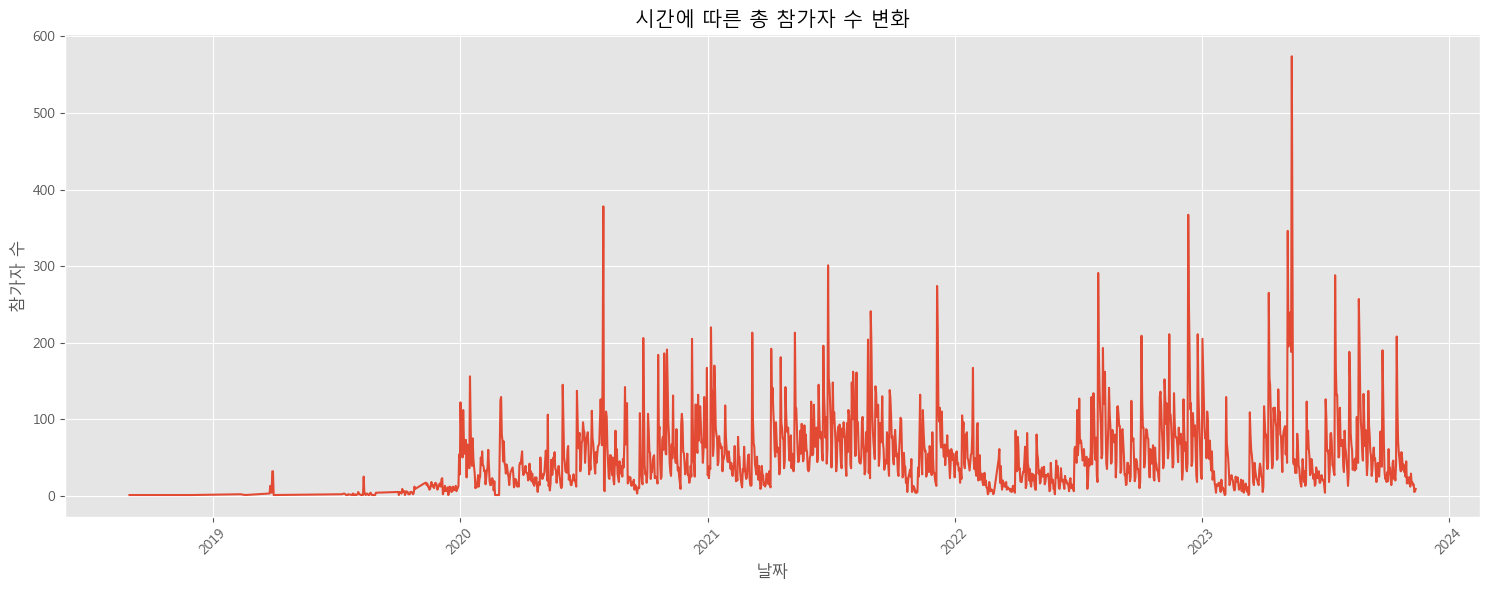

In [ ]:
# Plotting
plt.figure(figsize=(15,6))

#1 시간에 따른 참가자 수의 변화
# Grouping data by data and summung the number of participants
daily_participants = participate_log_df.groupby('일자')['참가자 수'].sum()
plt.plot(daily_participants.index, daily_participants.values)
plt.title('시간에 따른 총 참가자 수 변화')
plt.xlabel('날짜')
plt.ylabel('참가자 수')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# '일자; 칼럼을 datatime 형식으로 변환
submission_log_df['일자'] = pd.to_datetime(submission_log_df['일자'])

# 각 대회의 시작일을 찾기 위해, 각 대회별 가장 빠른 날짜 찾기
competition_start_dates = submission_log_df.groupby('ID')['일자'].min()

# 각 로그의 일자에서 해당 대회의 시작일을 빼서 경과일을 계산
# 이는 각 제출이 대회 시작 후 몇 번째 날에 이루어졌는지 나타냄
submission_log_df['경과일'] =submission_log_df.apply(lambda row: (row['일자'] - competition_start_dates[row['ID']]).days, axis=1)

# 시각화를 위한 설정
plt.figure(figsize=(15,12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

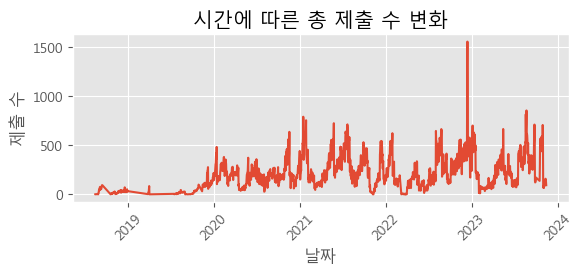

In [ ]:
# 1. 시간에 따른 총 제출 수의 변화
# 날짜별로 데이터 그룹화, 각 날짜의 제출 수 합산
daily_submissions = submission_log_df.groupby('일자')['제출 수'].sum()
plt.subplot(2, 1, 1) # 첫번째 그래프 위치 지정
plt.plot(daily_submissions.index, daily_submissions.values) # 날짜별 총 제출 수 그래프
plt.title('시간에 따른 총 제출 수 변화') # 그래프 제목
plt.xlabel('날짜')
plt.ylabel('제출 수')
plt.xticks(rotation=45)
plt.show()

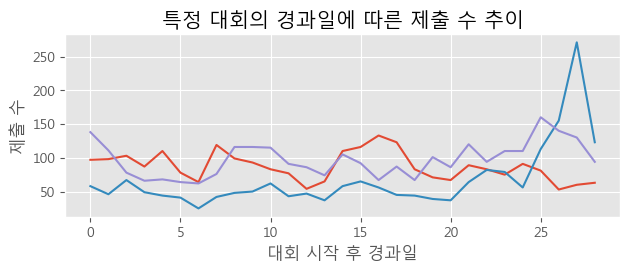

In [ ]:
# 2. 특정 대회의 제출 수 추이(대회 시작 후 경과일 기준)
plt.subplot(2, 1, 2)
sample_competitions = ['ID_126', 'ID_131', 'ID_147'] #특정 샘플 대회 선정
for comp_id in sample_competitions:
    comp_data = submission_log_df[submission_log_df['ID'] == comp_id]
    plt.plot(comp_data['경과일'], comp_data['제출 수'], label=comp_id) #각 대회별 결과일에 따른 제출 수 그래프

plt.title('특정 대회의 경과일에 따른 제출 수 추이')
plt.xlabel('대회 시작 후 경과일')
plt.ylabel('제출 수')

plt.tight_layout() #그래프 레이아웃 조정
plt.show() #그래프 표시

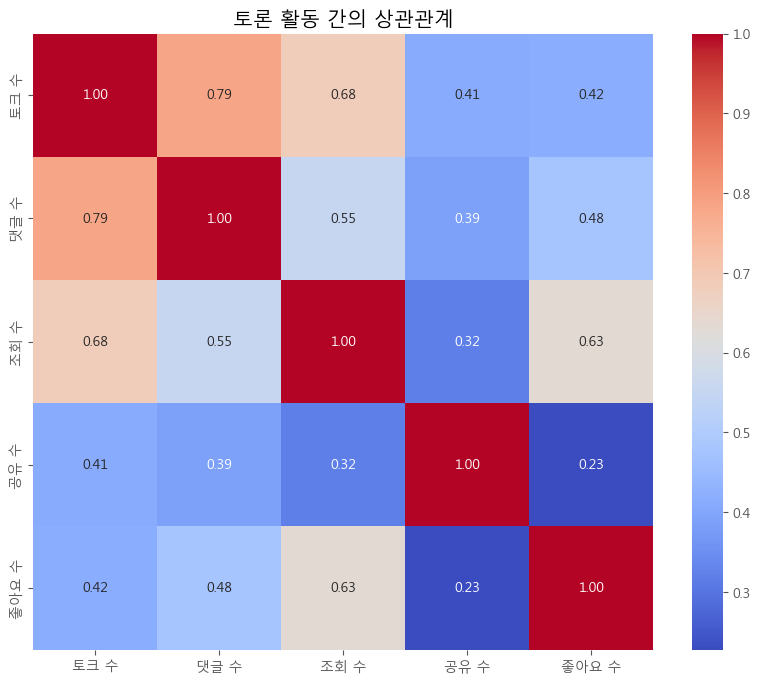

In [ ]:
#'일자' 칼럼을 datetime 형식으로 변환
talk_log_df['일자'] = pd.to_datetime(talk_log_df['일자'])

#상관관계별 히트맵 생성
correlation_matrix = talk_log_df[['토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('토론 활동 간의 상관관계')
plt.show()

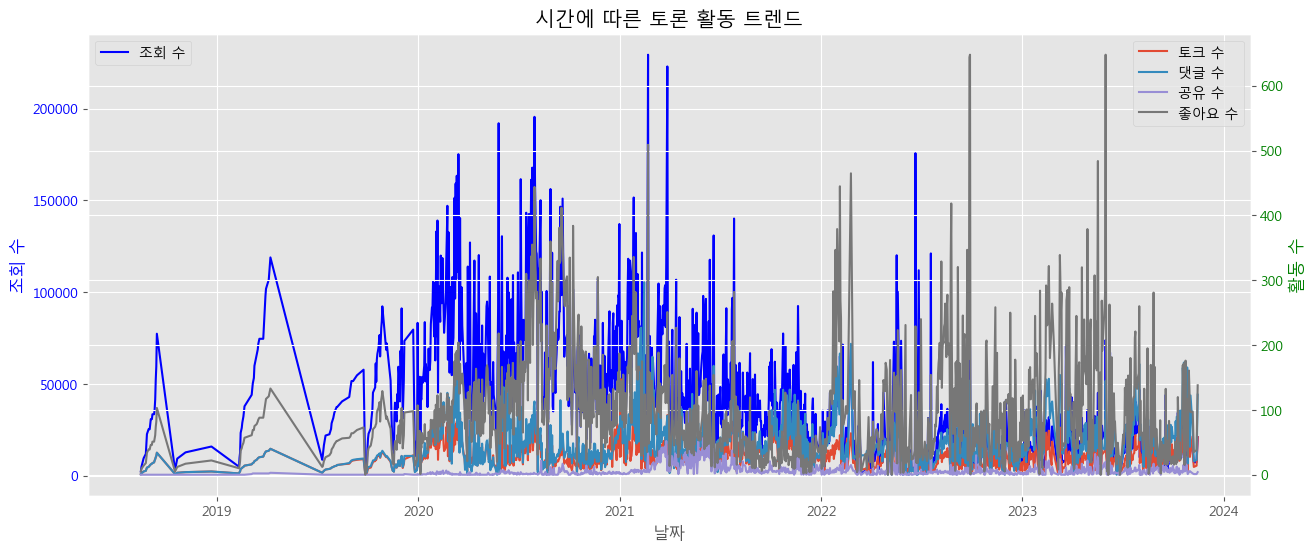

In [ ]:
# 시간에 따른 활용 트렌드 분석
daily_activity_trends = talk_log_df.groupby('일자').mean()[['토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수']]

# 서브플롯 분리하여 시각화
fig, ax1 = plt.subplots(figsize=(15,6))

# 조회 수를 별도의 서브플롯에 표시
ax1.plot(daily_activity_trends.index, daily_activity_trends['조회 수'], color='blue', label='조회 수')
ax1.set_title('시간에 따른 토론 활동 트렌드')
ax1.set_xlabel('날짜')
ax1.set_ylabel('조회 수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# 나머지 항목을 다른 서브플롯에 표시
ax2 = ax1.twinx() #x축을 공유하는 두번째 축
ax2.set_ylabel('활동 수', color='green')
for column in daily_activity_trends.columns.drop('조회 수'):
    ax2.plot(daily_activity_trends.index, daily_activity_trends[column], label=column)
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()

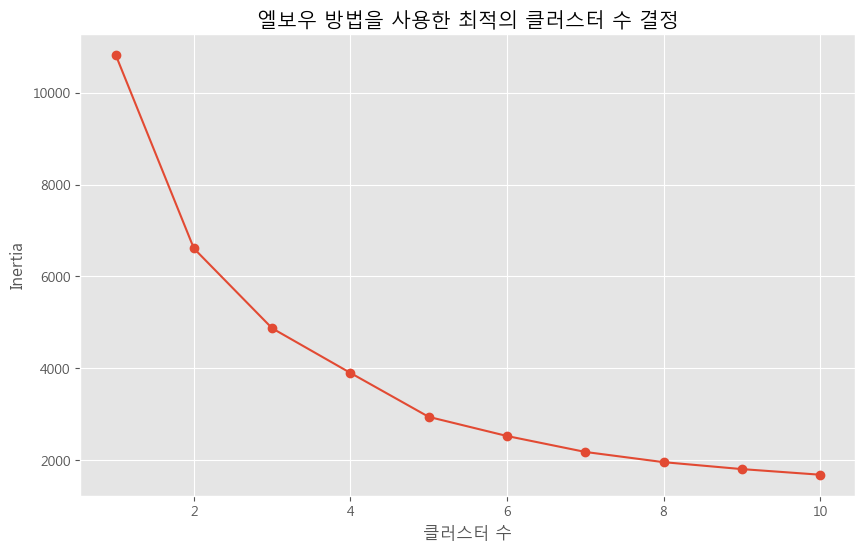

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 클러스터일레 사용할 피처 선택
features = ['코드 공유 수', '댓글 수', '조회 수', '공유 수', '다운로드 수', '좋아요 수']
X = codeshare_log_df[features]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('엘보우 방법을 사용한 최적의 클러스터 수 결정')
plt.xlabel('클러스터 수')
plt.ylabel('Inertia')
plt.show()

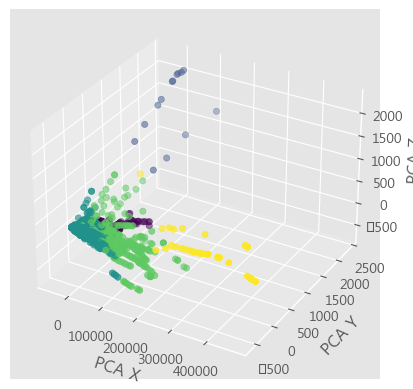

In [ ]:
features = ['코드 공유 수', '댓글 수', '공유 수', '다운로드 수', '좋아요 수', '조회 수']
X = codeshare_log_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# PCA를 통한 차원축소
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 전체 feature는 6차원이여서 시각화가 힘들기 때문에 시각화를 위해 3차원으로 차원축소
pca_transformed = pca.fit_transform(X) # PCA를 통해 전체 feature들의 특징을 반영한 3개의 feature 생성

X['pca_x'] = pca_transformed[:,0] # PCA로 생성된 첫 번째 feature를 임의로 x축으로 설정
X['pca_y'] = pca_transformed[:,1] # PCA로 생성된 첫 번째 feature를 임의로 y축으로 설정
X['pca_z'] = pca_transformed[:,2] # PCA로 생성된 첫 번째 feature를 임의로 z축으로 설정

X['Cluster'] = clusters # 군집화를 통해 구분된 군집을 추가

from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프 생성을 위한 패키지를 불러옵니다
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d') # 불러온 Axes3D를 fig에 추가해 3차원 시각화 공간을 형성합니다

x = X['pca_x']
y = X['pca_y']
z = X['pca_z']

ax.set_xlabel("PCA X")
ax.set_ylabel("PCA Y")
ax.set_zlabel("PCA Z")

ax.scatter(x, y, z, c= X["Cluster"]) # 3차원 Scatterplot을 그리며, 이를 X의 Cluster 값들로 구분해줍니다

plt.show()

In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# 클러스터 결과를 원본 데이터에 추가
codeshare_log_df['Cluster'] = clusters

# 클러스터별 평균값 계산
cluster_means = codeshare_log_df.groupby('Cluster').mean()

# 조회 수의 스케일을 조정합니다 (예: 천 단위로 변환)
cluster_means['조회 수 (백 단위)'] = cluster_means['조회 수'] / 100

# 수정된 조회 수와 나머지 지표들을 모두 막대 그래프로 표현합니다.
modified_features = ['코드 공유 수', '댓글 수', '공유 수', '다운로드 수', '좋아요 수', '조회 수 (백 단위)']

df.to_csv("cluster_means.csv", index = False)

In [ ]:
ls -l cluster_means.csv

-rw-r--r-- 1 root root 647 Jan 28 08:52 cluster_means.csv


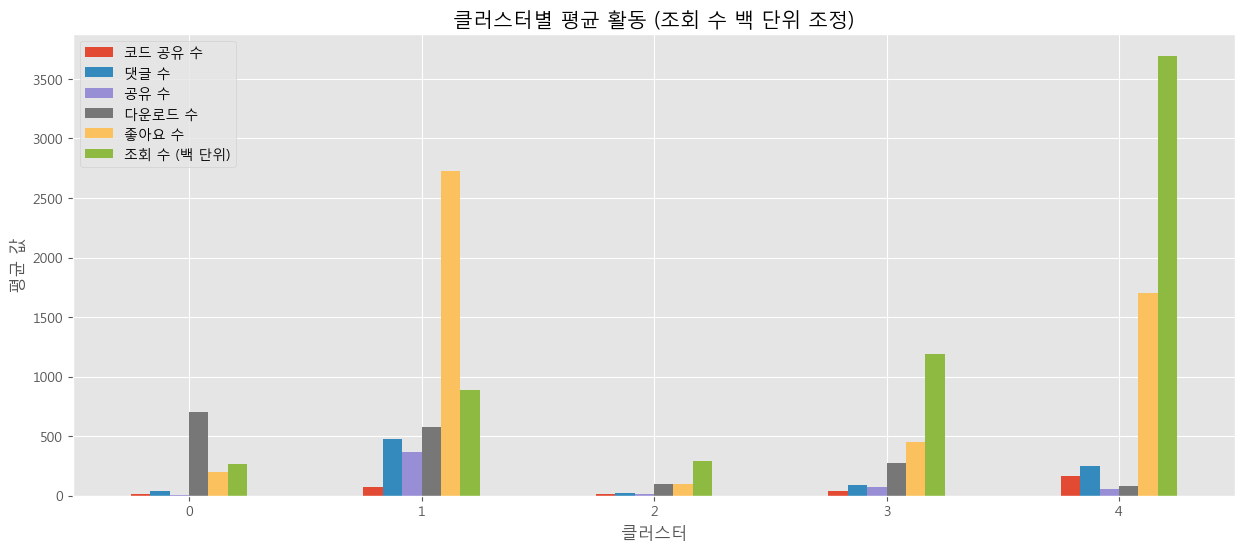

In [ ]:
cluster_means[modified_features].plot(kind='bar', figsize=(15, 6))
plt.title('클러스터별 평균 활동 (조회 수 백 단위 조정)')
plt.ylabel('평균 값')
plt.xlabel('클러스터')
plt.xticks(rotation=0)
plt.show()